In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import cv2

In [2]:
import matplotlib as mpl

# Set the animation embed limit to a larger value (e.g., 30 MB)
mpl.rcParams['animation.embed_limit'] = 30 * 1024 * 1024  # 30 MB

In [3]:
class HopfieldNetwork:
    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
        self.weights = np.zeros((n_neurons, n_neurons), dtype=np.float32)
        
    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)
        self.weights = np.round(self.weights / self.n_neurons, decimals=4)
        
    def run(self, input_pattern, steps=100, batch_size=5):
        pattern = input_pattern.copy().flatten()
        evolution = [pattern.copy()]
        for _ in range(steps):
            neuron_indices = np.random.choice(self.n_neurons, batch_size, replace=False)
            for neuron_index in neuron_indices:
                net_input = np.dot(self.weights[neuron_index], pattern)
                pattern[neuron_index] = 1 if net_input >= 0 else -1
            evolution.append(pattern.copy())
        return evolution

In [4]:
def display_pattern(ax, pattern, height, width, title=""):
    ax.clear()
    ax.imshow(pattern.reshape(height, width), cmap='binary')  # Adjust the colormap as needed
    ax.set_title(title)
    ax.axis('off')  # Hide the axes for better visualization

In [42]:


# Define the 15x15 plus sign pattern (+1 and -1 representation)
size = 20
plus_sign = np.ones((size, size), dtype=int)
plus_sign[size//2-2:size//2+2, :] = -1  # Horizontal bar of the plus
plus_sign[:, size//2-2:size//2+2] = -1  # Vertical bar of the plus
plus_sign = plus_sign.flatten()

# Create a completely random pattern as the initial input
random_pattern = np.random.choice([1, -1], size=size**2)

# Initialize Hopfield Network
hopfield_net = HopfieldNetwork(n_neurons=size**2)

# Train the Hopfield network on the original plus sign pattern
hopfield_net.train([plus_sign])




NameError: name 'size' is not defined

Error in callback <function _draw_all_if_interactive at 0x0000018F63204040> (for post_execute), with arguments args (),kwargs {}:


NameError: name 'size' is not defined

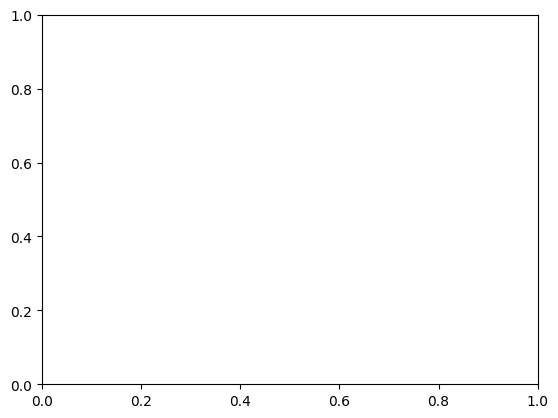

In [166]:
# Run the network starting from the completely random pattern (more steps for slower evolution)
evolution = hopfield_net.run(random_pattern, steps=500)

# Set up the figure and axis for the animation
fig, ax = plt.subplots()

def update(frame):
    pattern = evolution[frame]
    display_pattern(ax, pattern, size, title=f"Iteration {frame}")

ani = animation.FuncAnimation(fig, update, frames=len(evolution), interval=100, repeat=False)

# Use HTML to display the animation inline
HTML(ani.to_jshtml())

In [41]:
animation_file = "hopfield_network.mp4"
ani.save(animation_file, writer='ffmpeg', fps=30)

In [144]:

image = cv2.imread('troll.bmp', cv2.IMREAD_GRAYSCALE)

In [145]:
image = image.astype(np.int8)

In [146]:
image.min(), image.max()

(np.int8(-126), np.int8(127))

In [147]:
image = np.where(image > 0, -1, 1)

In [148]:
image = image.astype(np.int8)

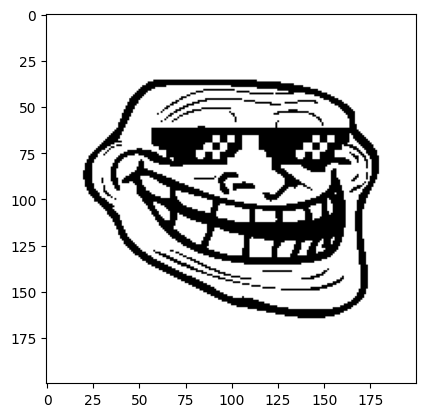

In [149]:
plt.imshow(image, cmap='gray')

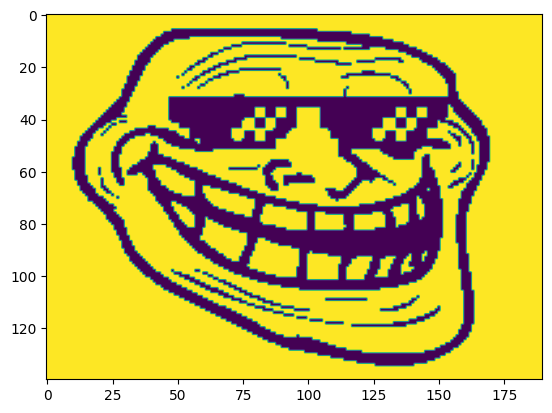

In [155]:
plt.imshow(image[30:170, 10:])

In [156]:
# small_image = cv2.resize(image, (170, 150), interpolation=cv2.INTER_NEAREST).astype(np.int8)[:, 30:]
# small_image = cv2.resize(image[:1200, 100:], (120, 120), interpolation=cv2.INTER_NEAREST).astype(np.int8)
small_image = cv2.resize(image[30:170, 10:], (100, 100), interpolation=cv2.INTER_NEAREST).astype(np.int8)

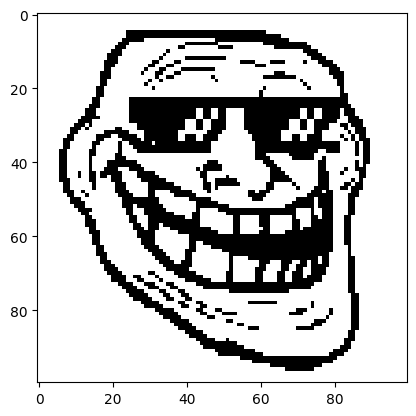

In [157]:
plt.imshow(small_image, cmap='gray')

In [158]:
small_image.dtype

dtype('int8')

In [159]:
hopfield_net = HopfieldNetwork(n_neurons=small_image.size)

In [160]:
hopfield_net.train([small_image])

In [161]:
image.shape

(200, 200)

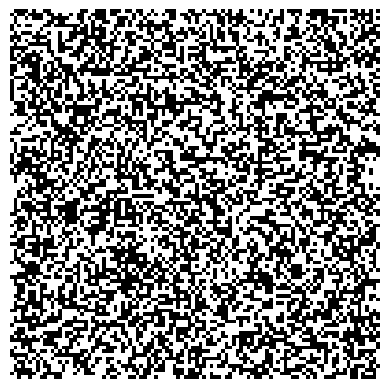

In [167]:
random_pattern = np.random.choice([1, -1], size=small_image.size)

# Run the network starting from the completely random pattern (more steps for slower evolution)
evolution = hopfield_net.run(random_pattern, steps=600, batch_size=90)

# Set up the figure and axis for the animation
fig, ax = plt.subplots()

def update(frame):
    pattern = evolution[frame]
    # display_pattern(ax, pattern, height=small_image.shape[0], width=small_image.shape[1], title=f"Iteration {frame}")
    display_pattern(ax, pattern, height=small_image.shape[0], width=small_image.shape[1])

ani = animation.FuncAnimation(fig, update, frames=len(evolution), interval=100, repeat=False)

# Use HTML to display the animation inline
HTML(ani.to_jshtml())

In [168]:
animation_file = "troll.mp4"
ani.save(animation_file, writer='ffmpeg', fps=60)